<a href="https://colab.research.google.com/github/mhlfsb/PET-GOV/blob/main/IA/PET_GOV_RH_IA_IC_Exerc%C3%ADcio_de_Classe_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

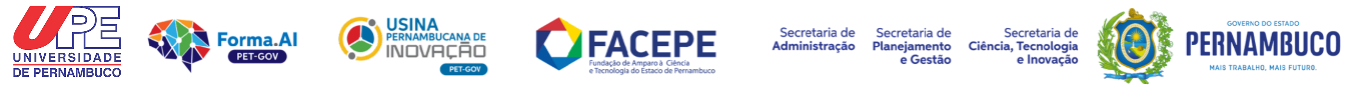

 **Inteligência Artificial, Ciência de dados e Analytics**

Programa de formação de RH-Público em Inteligência Artificial, Ciência de Dados e Analytics (RH.IA-PE)

**Professor Responsável Projeto:** Ph.D. Fernando Buarque de Lima Neto 

**Professor do módulo**: Ph.D. Fernando Buarque de Lima Neto 

Mestrando Gabriel Kopte


---


**Módulo:** 2 - Inteligência Artificial			

**Atividade:** Aula 08 - *Inteligência de Enxame* - Fish School Search (FSS)

# **Exercício de Classe-5: *Inteligência de Enxames* - Fish School Search (FSS)**

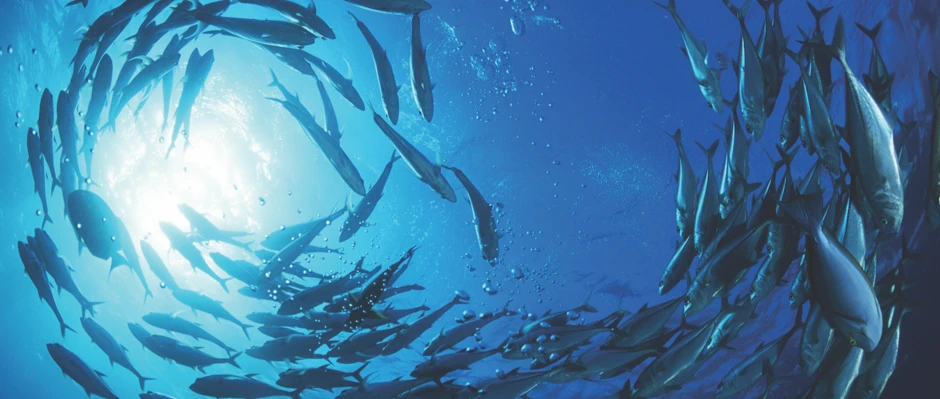

<p align="justify"> <font color='aquamarine'><b>FSS</b></font> é uma família de algoritmos adequados para otimização em espaços de busca de alta dimensão. Todos os peixes realizam buscas locais e o cardume agrega informações sociais. O FSS é rápido, supera a maioria dos outros algoritmos Swarm Intelligent e é computacionalmente barato. Novas investigações também mostram que o FSS é fácil de usar -GPU.</p>

### **Princícios do FSS**

1. **Cálculos simples para todos indivíduos (peixes)**
2. **Várias formas de armazenamento de informações:**  Pesos de peixe e baricentro do cardume
3. **Baixa comunicação entre os indivíduos vizinhos.** os peixes devem pensar local, mas também estarem socialmente conscientes
4. **Controle de mínimo centralizado.** Principalmente para autocontrole do raio do cardume
5. **Mecanismos de diversidade.** Isto evita "comportamento de manada" indesejável.
6. **Escalabilidade** em termos de complexidade das tarefas de otimização e busca.
7. **Autonomia:** Capacidade de autocontrole de funcionamento



### **OPERADORES DO FSS**



* Operador de Feeding
* Operador de Movimento Individual
* Operador de Movimento de Instinto Coletivo
* Operador de Movimento Volitivo

### **Conceitos**


**Aquário** →
Região no espaço de busca onde o peixe pode ser posicionado e permitido a movimentação.


**Densidade alimentar do aquário** →
Relacionado à função a ser otimizada no espaço de busca

**<u>Operadores</u>**

**Feeding:**→ A qualidade da solução para o problema


**Swimming:**→ Conduz os movimentos dos peixes.

O algoritmo começa com os peixes sendo iniciados em posições aleatórias.

As **orientações de busca** no FSS são influenciadas apenas por **peixes de sucesso**.


Para que isso aconteça, o FSS exige que os **operadores de Swimming** se conectem ao **operador de Feeding.**

### **STEPS DO FSS**


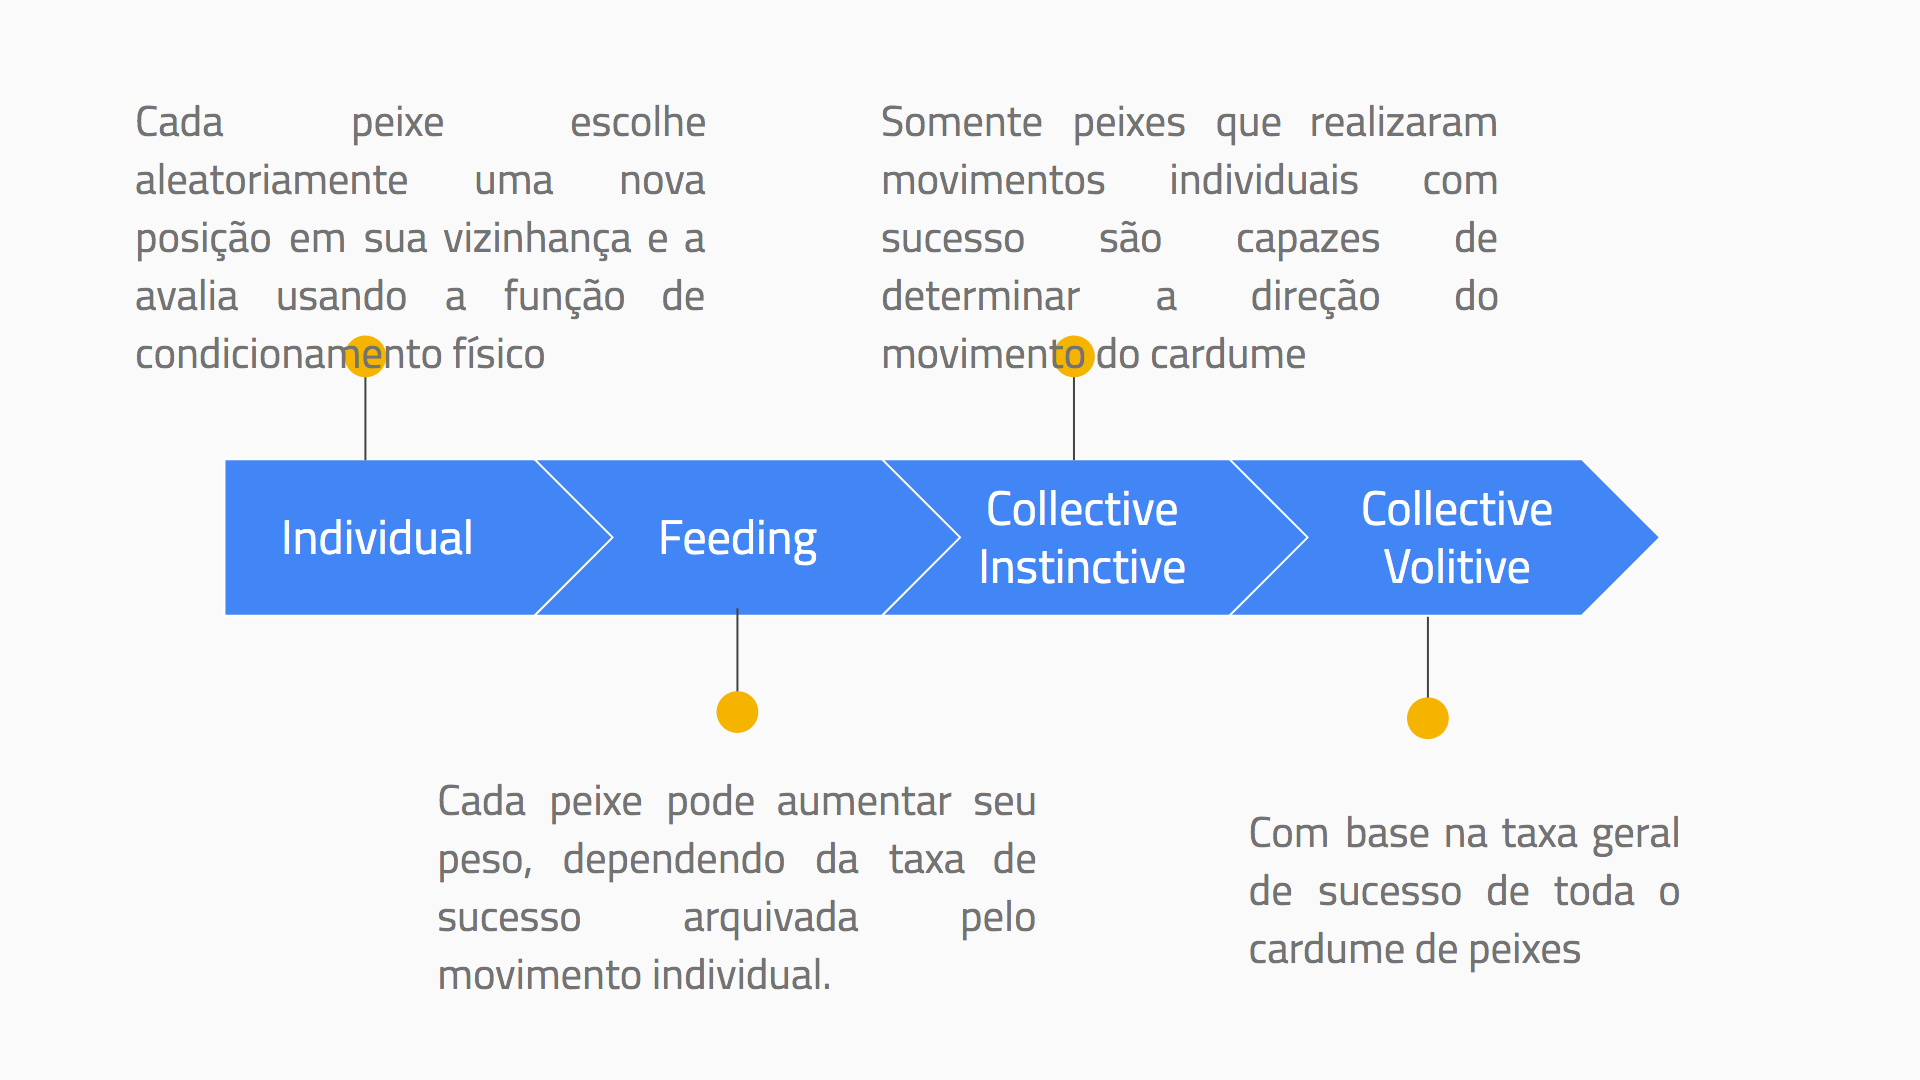

### **PSEUDO-CODIGO FSS**

```
initialize randomly all fish;
while stop criterion is not met do
  for each fish do
    individual movement
      + evaluate fitness function;
      feeding operator;
  end
  for each fish do
    instinctive movement;
  end
  Calculate barycentre;
  for each fish do
    volitive movement;
    evaluate fitness function;
    end
  update stepind
end
```

### **Contexto lógico**

1. "Nadar" é um meio de:
  * Realizar uma busca local
  * Armazenar boas informações
  * Transmitir, indiretamente, informações sociais
2. O sucesso da busca é dado por:
  * Pesos dos peixe (quanto maior melhor)
  * Raio do cardume (quanto menor melhor)
  * Baricentro do cardume (quanto mais perto do ótimo melhor)
3. A não-monotonicidade é alcançada por:
  * Hesitação aleatória antes de nadar
  * Expansão/encolhimento do raio do cardume
  * Variações nos componentes do nado

Implementação baseada em:

* "A Novel Search Algorithm based on Fish School Behavior" published in 2008 by Bastos Filho, Lima Neto,
Lins, D. O. Nascimento and P. Lima (https://ieeexplore.ieee.org/abstract/document/4811695)


* "An Enhanced Fish School Search Algorithm" published in 2013 by Bastos Filho and  D. O. Nascimento (https://ieeexplore.ieee.org/abstract/document/6855843)

Código original criado por:
* Clodomir Santana Jr. (cjsj@ecomp.poli.br)
* Elliackin Figueredo (emnf@ecomp.poli.br)
* Mariana Macedo (mgmm@ecomp.poli.br)
* Pedro Santos (pjbls@ecomp.poli.br)

### Importa biblioteca

In [9]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import numpy as np

## **Peixe (indivíduo)**

**Indivíduo da população.**

Cada peixe possui uma determinada posição no espaço de busca do problema e esta posição representa uma solução em potencial para o problema tratado.

Esta classe define um peixe com as seguinte caracteristicas:
* `pos` - posição do peixe no espaço de busca
* `delta_pos` - distância para a posição anterior
* `delta_cost` - diferença entre as custo atual e custo anterior
* `weight`- indica o peso do peixe, indiça o sucesso do peixe (quanto mais pesado melhor)
* `cost` - custo da posição atual do peixe. Resultado da função de custo utilizada.
* `has_improved` - flag que indica se o peixe melhorou em relação a última situação

In [10]:
class Fish(object):
    def __init__(self, dim):
        nan = float('nan')
        self.pos = [nan for _ in range(dim)]
        self.delta_pos = np.nan
        self.delta_cost = np.nan
        self.weight = np.nan
        self.cost = np.nan
        self.has_improved = False

## **Cardume**

In [11]:
class FSS(object):
    #Atributos de inicializacao do Cardume
    def __init__(self, objective_function, search_space_initializer, n_iter, school_size, step_individual_init,
                 step_individual_final, step_volitive_init, step_volitive_final, min_w, w_scale):
        self.objective_function = objective_function
        self.search_space_initializer = search_space_initializer

        self.dim = objective_function.dim
        self.minf = objective_function.minf
        self.maxf = objective_function.maxf
        self.n_iter = n_iter

        self.school_size = school_size
        self.step_individual_init = step_individual_init
        self.step_individual_final = step_individual_final
        self.step_volitive_init = step_volitive_init
        self.step_volitive_final = step_volitive_final

        self.curr_step_individual = self.step_individual_init * (self.maxf - self.minf)
        self.curr_step_volitive = self.step_volitive_init * (self.maxf - self.minf)
        self.min_w = min_w
        self.w_scale = w_scale
        self.prev_weight_school = 0.0
        self.curr_weight_school = 0.0
        self.best_fish = None
        self.pos_hist = []

        self.optimum_cost_tracking_iter = []
        self.optimum_cost_tracking_eval = []
    
    def __gen_weight(self):
        return self.w_scale / 2.0

    # inicializa veriavel que rasteia ótimo global
    def __init_fss(self):
        self.optimum_cost_tracking_iter = []
        self.optimum_cost_tracking_eval = []

    # cria um peixe
    def __init_fish(self, pos):
        fish = Fish(self.dim)
        fish.pos = pos
        fish.weight = self.__gen_weight()
        fish.cost = self.objective_function.evaluate(fish.pos)
        self.optimum_cost_tracking_eval.append(self.best_fish.cost)
        return fish

    # cria o cardume
    # inicializa variáveis com informações coletivas
    def __init_school(self):
        self.best_fish = Fish(self.dim)
        self.best_fish.cost = np.inf
        self.curr_weight_school = 0.0
        self.prev_weight_school = 0.0
        self.school = []

        positions = self.search_space_initializer.sample(self.objective_function, self.school_size)

        for idx in range(self.school_size):
            fish = self.__init_fish(positions[idx])
            self.school.append(fish)
            self.curr_weight_school += fish.weight
        self.prev_weight_school = self.curr_weight_school
        self.update_best_fish()
        self.optimum_cost_tracking_iter.append(self.best_fish.cost)

    # retorna melhor variação de custo no cardume
    def max_delta_cost(self):
        max_ = 0
        for fish in self.school:
            if max_ < fish.delta_cost:
                max_ = fish.delta_cost
        return max_

    def total_school_weight(self):
        self.prev_weight_school = self.curr_weight_school
        self.curr_weight_school = 0.0
        for fish in self.school:
            self.curr_weight_school += fish.weight

    # Calcula o baricentro do cardume 
    # O baricentro também é chamado de centro gravitacinal.
    # Pode ser entendido como uma média ponderada da posição do peixe, sendo
    # o peso do peixe o peso da média ponderada, para cada dimensão do espaço
    # de busca. 
    def calculate_barycenter(self):
        barycenter = np.zeros((self.dim,), dtype=np.float)
        density = 0.0

        for fish in self.school:
            density += fish.weight
            for dim in range(self.dim):
                barycenter[dim] += (fish.pos[dim] * fish.weight)
        for dim in range(self.dim):
            barycenter[dim] = barycenter[dim] / density

        return barycenter

    def update_steps(self, curr_iter):
        self.curr_step_individual = self.step_individual_init - curr_iter * float(
            self.step_individual_init - self.step_individual_final) / self.n_iter

        self.curr_step_volitive = self.step_volitive_init - curr_iter * float(
            self.step_volitive_init - self.step_volitive_final) / self.n_iter

    def update_best_fish(self):
        for fish in self.school:
            if self.best_fish.cost > fish.cost:
                self.best_fish = copy.copy(fish)

    def feeding(self):
        for fish in self.school:
            if self.max_delta_cost():
                fish.weight = fish.weight + (fish.delta_cost / self.max_delta_cost())
            if fish.weight > self.w_scale:
                fish.weight = self.w_scale
            elif fish.weight < self.min_w:
                fish.weight = self.min_w

    def individual_movement(self):
        for fish in self.school:
            new_pos = np.zeros((self.dim,), dtype=np.float)
            for dim in range(self.dim):
                new_pos[dim] = fish.pos[dim] + (self.curr_step_individual * np.random.uniform(-1, 1))
                if new_pos[dim] < self.minf:
                    new_pos[dim] = self.minf
                elif new_pos[dim] > self.maxf:
                    new_pos[dim] = self.maxf
            cost = self.objective_function.evaluate(new_pos)
            self.optimum_cost_tracking_eval.append(self.best_fish.cost)
            if cost < fish.cost:
                fish.delta_cost = abs(cost - fish.cost)
                fish.cost = cost
                delta_pos = np.zeros((self.dim,), dtype=np.float)
                for idx in range(self.dim):
                    delta_pos[idx] = new_pos[idx] - fish.pos[idx]
                fish.delta_pos = delta_pos
                fish.pos = new_pos
            else:
                fish.delta_pos = np.zeros((self.dim,), dtype=np.float)
                fish.delta_cost = 0

    def collective_instinctive_movement(self):
        cost_eval_enhanced = np.zeros((self.dim,), dtype=np.float)
        density = 0.0
        for fish in self.school:
            density += fish.delta_cost
            for dim in range(self.dim):
                cost_eval_enhanced[dim] += (fish.delta_pos[dim] * fish.delta_cost)
        for dim in range(self.dim):
            if density != 0:
                cost_eval_enhanced[dim] = cost_eval_enhanced[dim] / density
        for fish in self.school:
            new_pos = np.zeros((self.dim,), dtype=np.float)
            for dim in range(self.dim):
                new_pos[dim] = fish.pos[dim] + cost_eval_enhanced[dim]
                if new_pos[dim] < self.minf:
                    new_pos[dim] = self.minf
                elif new_pos[dim] > self.maxf:
                    new_pos[dim] = self.maxf

            fish.pos = new_pos

    def collective_volitive_movement(self):
        self.total_school_weight()
        barycenter = self.calculate_barycenter()
        for fish in self.school:
            new_pos = np.zeros((self.dim,), dtype=np.float)
            for dim in range(self.dim):
                if self.curr_weight_school > self.prev_weight_school:
                    new_pos[dim] = fish.pos[dim] - ((fish.pos[dim] - barycenter[dim]) * self.curr_step_volitive *
                                                    np.random.uniform(0, 1))
                else:
                    new_pos[dim] = fish.pos[dim] + ((fish.pos[dim] - barycenter[dim]) * self.curr_step_volitive *
                                                    np.random.uniform(0, 1))
                if new_pos[dim] < self.minf:
                    new_pos[dim] = self.minf
                elif new_pos[dim] > self.maxf:
                    new_pos[dim] = self.maxf

            cost = self.objective_function.evaluate(new_pos)
            self.optimum_cost_tracking_eval.append(self.best_fish.cost)
            fish.cost = cost
            fish.pos = new_pos

    def optimize(self):
        #Inicializa FSS e cardume
        self.__init_fss()
        self.__init_school()

        for i in range(self.n_iter):
            self.individual_movement()
            self.update_best_fish()
            self.feeding()
            self.collective_instinctive_movement()
            self.collective_volitive_movement()
            self.update_steps(i)
            self.update_best_fish()
            self.optimum_cost_tracking_iter.append(self.best_fish.cost)
            self.pos_hist.append([fish.pos for fish in opt1.school])
            # print("Iteration: ", i, " Cost: ", self.best_fish.cost)


O Método `optimize` é onde todo o processo do FSS acontece 


### **Objective Functions**

In [12]:
import math
import numpy as np

# This code was based on in the following references:
# [1] "Defining a Standard for Particle Swarm Optimization" published in 2007 by Bratton and Kennedy

class ObjectiveFunction(object):
    def __init__(self, name, dim, minf, maxf):
        self.function_name = name
        self.dim = dim
        self.minf = minf
        self.maxf = maxf

    def evaluate(self, x):
        pass

class GeneralizedShwefelFunction(ObjectiveFunction):
    def __init__(self, dim):
        super(GeneralizedShwefelFunction, self).__init__('GeneralizedShwefel', dim, -30.0, 30.0)

    def evaluate(self, x):
        f_x = [xi * np.sin(np.sqrt(np.absolute(xi))) for xi in x]
        return -sum(f_x)



### **Generalized Shwefel**

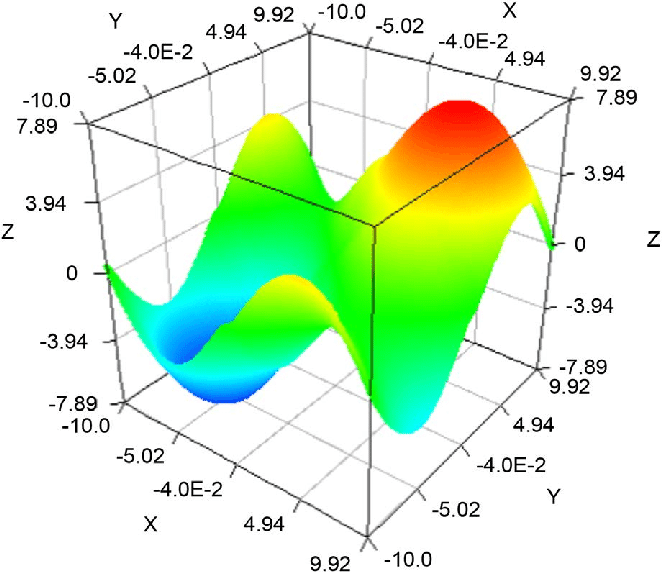

#### Funções de suporte

In [13]:
import numpy as np

class SearchSpaceInitializer(object):

    def sample(self,objective_function,n):
        pass


class UniformSSInitializer(SearchSpaceInitializer):

    def sample(self, objective_function,n):
        x = np.zeros((n, objective_function.dim))
        for i in range(n):
            x[i] = np.random.uniform(objective_function.minf, objective_function.maxf, objective_function.dim)
        return x


# Based on paper [1]
class OneQuarterDimWiseSSInitializer(SearchSpaceInitializer):

    def sample(self, objective_function, n):
        min_init_fb = objective_function.maxf - ((1.0 / 4.0) * (objective_function.maxf - objective_function.minf))
        max_init_fb = objective_function.maxf

        x = np.zeros((n, objective_function.dim))
        for i in range(n):
            x[i] = np.random.uniform(  min_init_fb, max_init_fb, objective_function.dim)
        return x


## **Simulando o aquário**

In [14]:
search_space_initializer = UniformSSInitializer()
# file_path = os.path.dirname(os.path.abspath(__file__)) + os.sep + "Executions" + os.sep
file_path = ''
num_exec = 30
school_size = 30
num_iterations = 1000
step_individual_init = 0.1
step_individual_final = 0.0001
step_volitive_init = 0.01
step_volitive_final = 0.001
min_w = 1
w_scale = num_iterations / 2.0
n_iter = 1000

dim = 2

func = GeneralizedShwefelFunction(dim)

# Notice that for CEC Functions only the following dimensions are available:
# 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
cec_functions = [ ]
opt1 = FSS(objective_function=func, search_space_initializer=search_space_initializer,
                   n_iter=n_iter, school_size=school_size, step_individual_init=step_individual_init,
                   step_individual_final=step_individual_final, step_volitive_init=step_volitive_init,
                   step_volitive_final=step_volitive_final, min_w=min_w, w_scale=w_scale)

opt1.optimize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: DeprecationWarning: `np.float` is a deprecated alias f

## **Visualizando o desenpenho**

Text(0.5, 0, 'Número de Iterações')

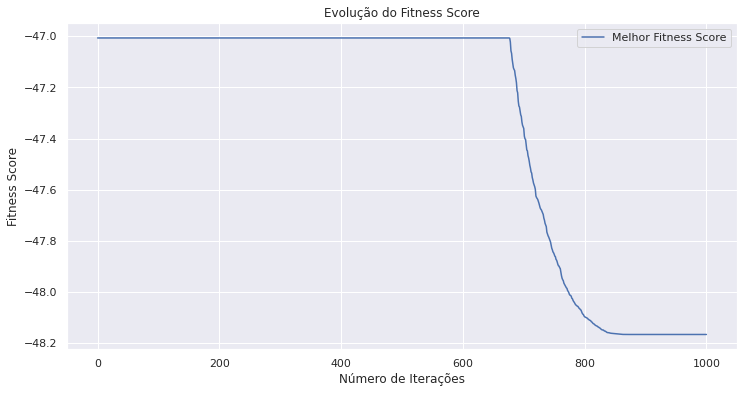

In [15]:
import seaborn as sns
ax = sns.set(rc={'figure.figsize':(12, 6)})
ax = sns.lineplot( data=opt1.optimum_cost_tracking_iter, label="Melhor Fitness Score")
ax.set_title("Evolução do Fitness Score")
ax.set_ylabel('Fitness Score')
ax.set_xlabel('Número de Iterações')

## Visualizando Posição dos Peixes

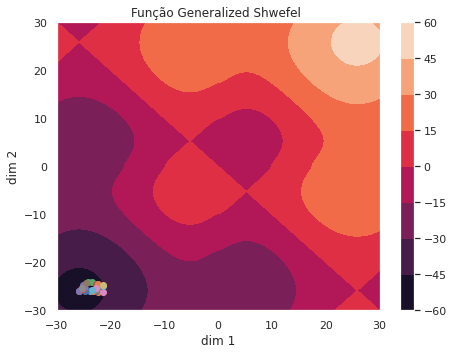

In [16]:
fig = plt.figure(figsize=(7,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

start, stop, n_values = -30, 30, 1000

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = func.evaluate([X,Y])

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Função Generalized Shwefel ')
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')


# Entrar o número da iteração para visualização
iterations = 999

for f in opt1.pos_hist[iterations]:
      plt.plot(f[0],f[1], marker='o')

plt.axis([-30, 30, -30, 30])
plt.show()

#### Referencias

1. https://pavlovsk.org/a-tutorial-on-optimizing-particle-swarm-in-python/
2. https://pyswarms.readthedocs.io/en/latest/examples/tutorials/visualization.html
3. https://link.springer.com/content/pdf/10.1007/s11071-020-05743-y.pdf
4. https://nathanrooy.github.io/posts/2016-08-17/simple-particle-swarm-optimization-with-python/